In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
alunos = pd.read_excel("aprovacao_alunos.xlsx")
alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


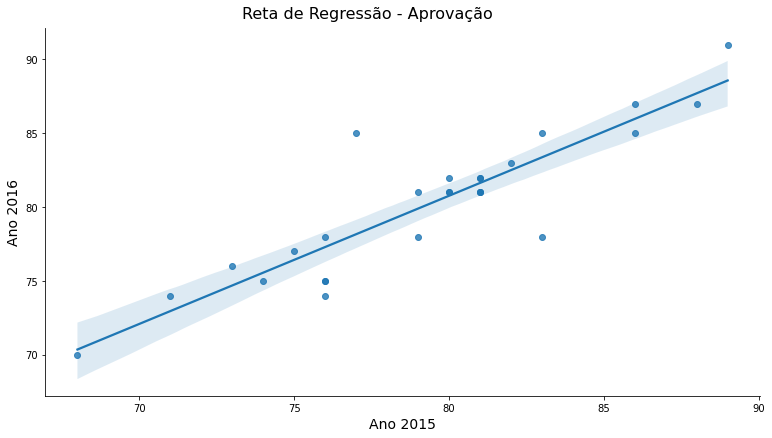

In [6]:
ax = sns.lmplot(x = 'ano_2015', y = 'ano_2016', data=alunos)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - Aprovação', fontsize=16, y=1.02)
ax.set_xlabels('Ano 2015', fontsize = 14)
ax.set_ylabels('Ano 2016', fontsize = 14)
ax;

In [8]:
alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [9]:
import statsmodels.api as sm

In [10]:
Y= alunos.ano_2016
X = sm.add_constant(alunos.ano_2015)

In [11]:
Y.head()

0    85
1    81
2    85
3    82
4    76
Name: ano_2016, dtype: int64

In [12]:
resultado_regressão = sm.OLS(Y,X).fit()

In [13]:
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.02e-10
Time:                        11:32:07   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
#Resíduo

In [14]:
alunos['Y_previsto'] = resultado_regressão.predict()
alunos

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089
5,Amapa,76,75,77.291450
6,Tocantins,81,82,81.632053
7,Maranhao,81,81,81.632053
8,Piaui,80,81,80.763932
9,Ceara,86,85,85.972655


In [17]:
alunos['Resíduo'] = alunos['Y_previsto'] - alunos['ano_2016']
alunos.head()

,UF,ano_2015,ano_2016,Y_previsto,Resíduo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
